#**LGBM & XGBM**
>Exploratory Data Analysis (EDA):

In [59]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Reading the file.
df = pd.read_csv('Titanic_train.csv')

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.shape

(891, 12)

In [64]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [65]:
# Checking for missing values.
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [66]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


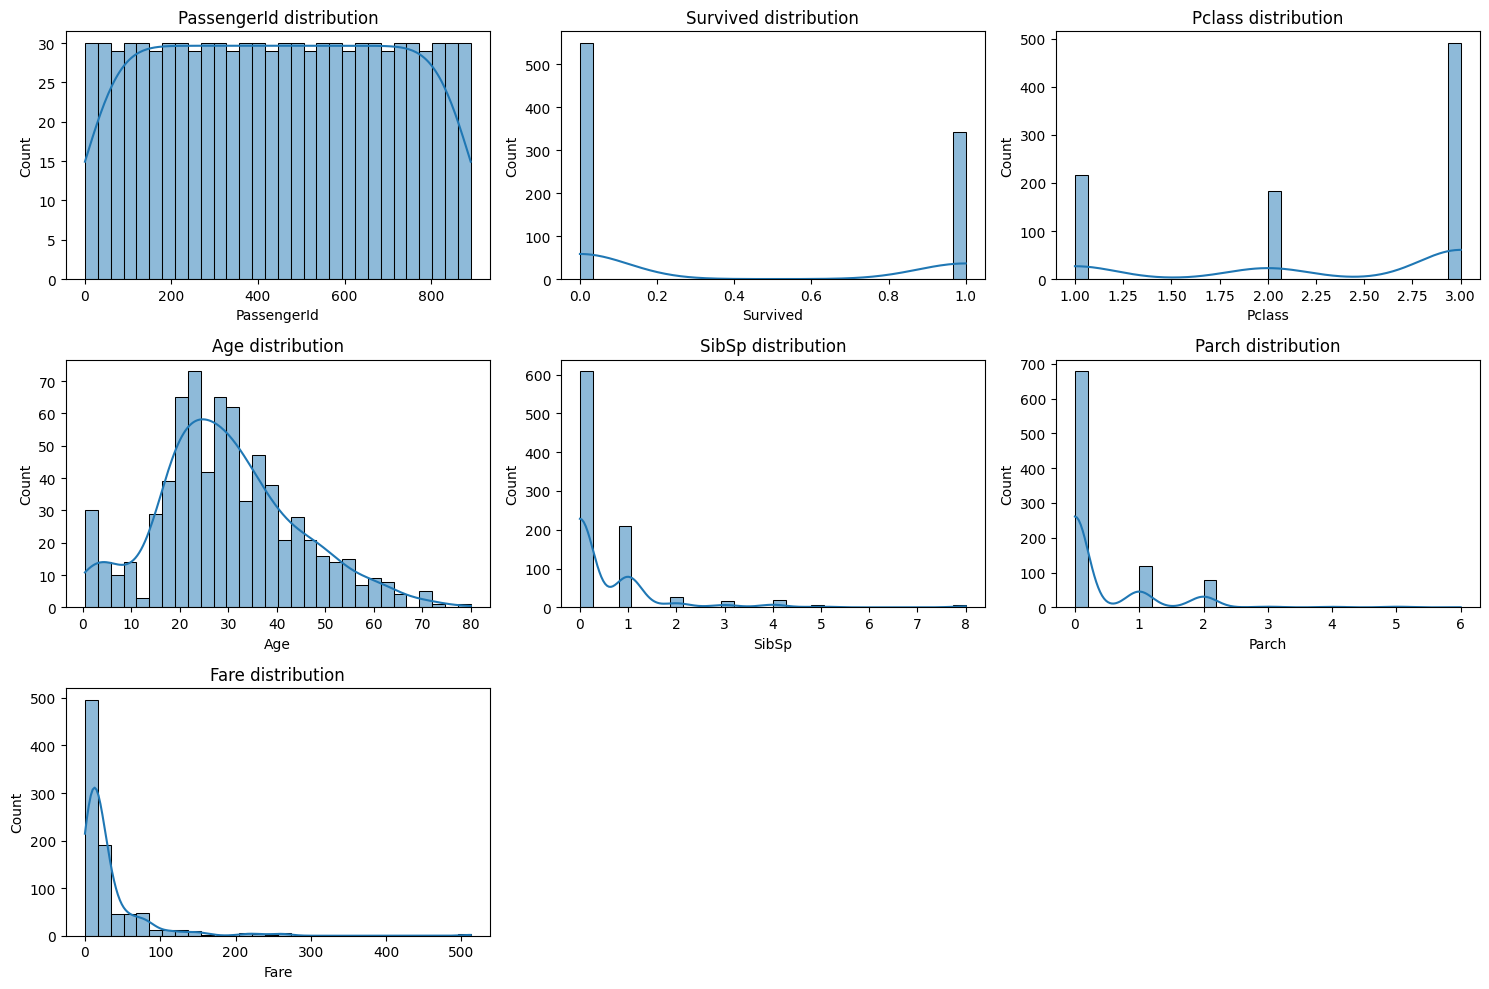

In [67]:
# Data visualization

# Histograms for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15,10)) # Increased figure size for better visualization
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i) # Adjusted subplot layout to 3 rows and 3 columns to accommodate all numeric columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} distribution')
plt.tight_layout()
plt.show()

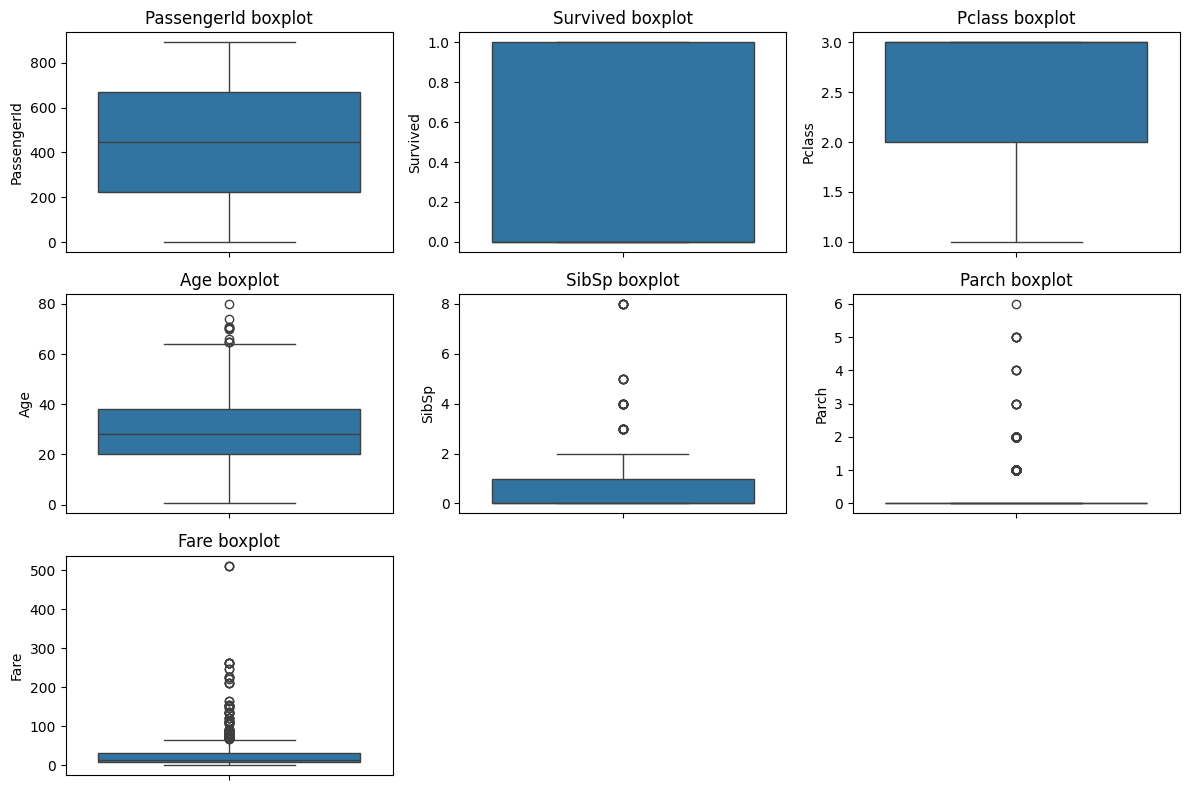

In [68]:
# Boxplots to see spread and outliers
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3,i) # Adjusted subplot layout to 3 rows and 3 columns to accommodate all numeric columns
    sns.boxplot(y=df[col])
    plt.title(f'{col} boxplot')
plt.tight_layout()
plt.show()

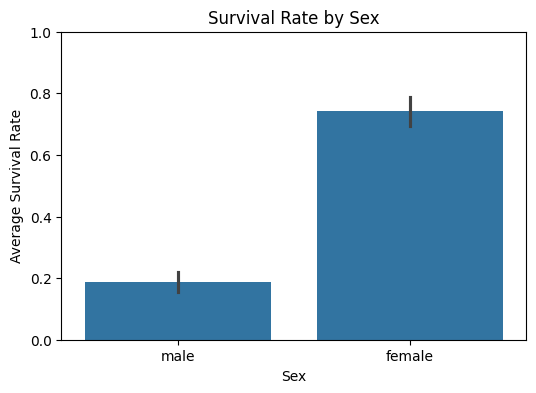

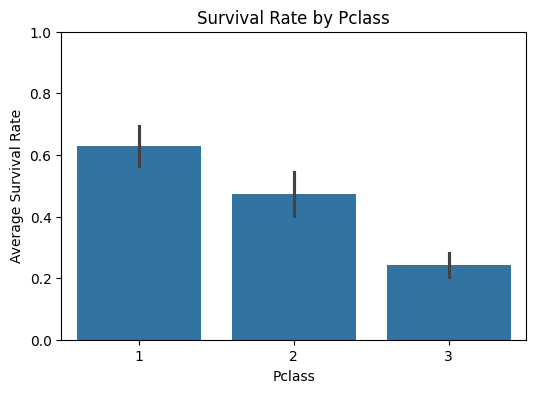

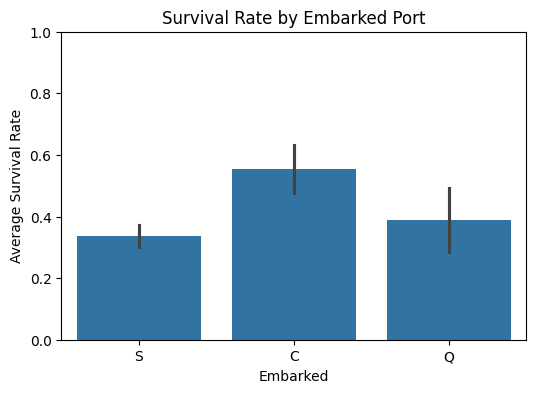

In [69]:
# Bar plot: Survival rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df, estimator=np.mean)
plt.title('Survival Rate by Sex')
plt.ylabel('Average Survival Rate')
plt.ylim(0,1)
plt.show()

# Bar plot: Survival rate by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, estimator=np.mean)
plt.title('Survival Rate by Pclass')
plt.ylabel('Average Survival Rate')
plt.ylim(0,1)
plt.show()

# Bar plot: Survival rate by Embarked Port
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df, estimator=np.mean)
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Average Survival Rate')
plt.ylim(0,1)
plt.show()


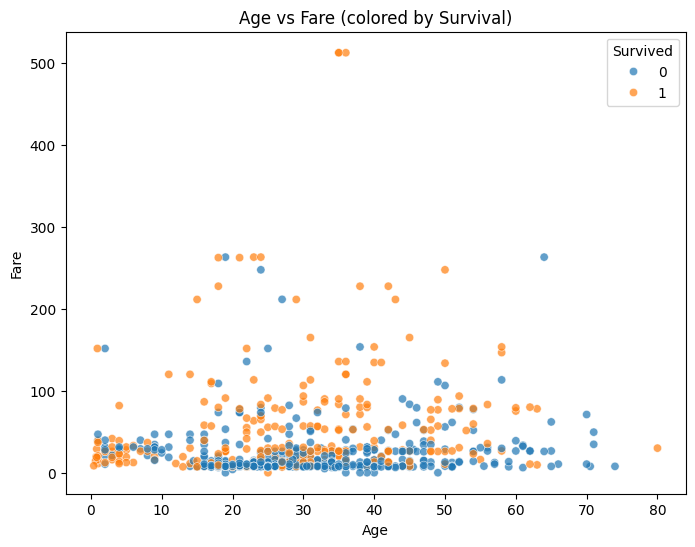

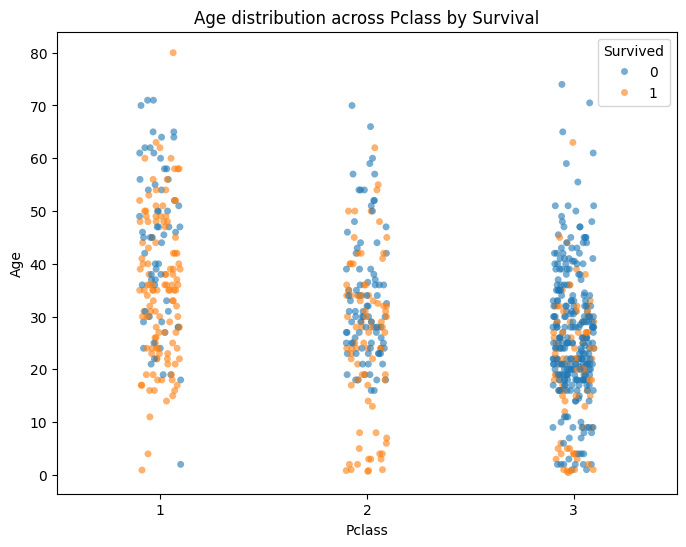

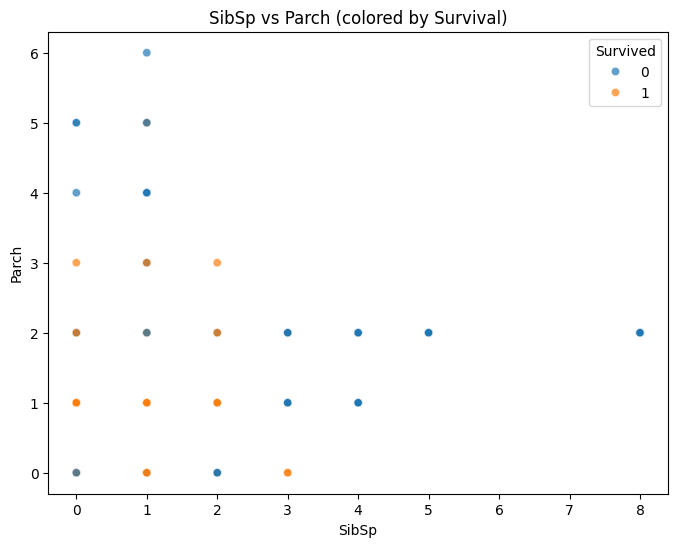

In [70]:
# Scatter plot: Age vs Fare colored by Survival
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.7)
plt.title('Age vs Fare (colored by Survival)')
plt.show()

# Scatter plot: Age vs Pclass (jittered)
plt.figure(figsize=(8,6))
sns.stripplot(x='Pclass', y='Age', hue='Survived', data=df, jitter=True, alpha=0.6)
plt.title('Age distribution across Pclass by Survival')
plt.show()

# Scatter plot: SibSp vs Parch (Family relation) colored by Survival
plt.figure(figsize=(8,6))
sns.scatterplot(x='SibSp', y='Parch', hue='Survived', data=df, alpha=0.7)
plt.title('SibSp vs Parch (colored by Survival)')
plt.show()


>Data Preprocessing:

In [71]:
# Handling the missing values.
df['Age']=df['Age'].fillna(df['Age'].mean())
df[['Cabin','Embarked']]=df[['Cabin','Embarked']].fillna(df[['Cabin','Embarked']].mode().iloc[0])

In [72]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [73]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = label.fit_transform(df['Embarked'])


In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2


>Building Predictive Models:

In [75]:
from sklearn.model_selection import train_test_split

X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 8)
Test shape: (179, 8)


In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    return acc, prec, rec, f1


In [86]:
from lightgbm import LGBMClassifier

# LightGBM model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [87]:
# Predictions on test set
y_pred_lgbm = lgbm.predict(X_test)
y_pred_lgbm

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1])

In [88]:
# XGBoost model
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [89]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [90]:
# Evaluate LightGBM model
evaluate_model(y_test, y_pred_lgbm, "LightGBM")


LightGBM Performance Metrics:
Accuracy : 0.7877
Precision: 0.7432
Recall   : 0.7432
F1 Score : 0.7432
Confusion Matrix:
 [[86 19]
 [19 55]]


(0.7877094972067039,
 0.7432432432432432,
 0.7432432432432432,
 0.7432432432432432)

In [91]:
# Evaluate XGBoost model
evaluate_model(y_test, y_pred_xgb, "XGBoost")


XGBoost Performance Metrics:
Accuracy : 0.8045
Precision: 0.7746
Recall   : 0.7432
F1 Score : 0.7586
Confusion Matrix:
 [[89 16]
 [19 55]]


(0.8044692737430168,
 0.7746478873239436,
 0.7432432432432432,
 0.7586206896551724)

In [92]:
from sklearn.model_selection import cross_val_score

# LightGBM Cross-Validation
lgbm_cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='accuracy')
print("LightGBM CV Accuracy:", lgbm_cv_scores)
print("LightGBM Mean CV Accuracy:", lgbm_cv_scores.mean())

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [93]:
# XGBoost Cross-Validation
xgb_cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", xgb_cv_scores)
print("XGBoost Mean CV Accuracy:", xgb_cv_scores.mean())

XGBoost CV Accuracy: [0.82517483 0.77622378 0.78169014 0.78169014 0.8028169 ]
XGBoost Mean CV Accuracy: 0.7935191568994385


In [94]:
# Hyperparameter Tuning (LightGBM)
from sklearn.model_selection import GridSearchCV

# Define parameter grid for LightGBM
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

# Initialize model
lgbm_tune = LGBMClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_lgbm = GridSearchCV(lgbm_tune, param_grid_lgbm, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lgbm.fit(X_train, y_train)

print("Best Parameters for LightGBM:", grid_lgbm.best_params_)
print("Best CV Accuracy for LightGBM:", grid_lgbm.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [95]:
# Hyperparameter Tuning (XGBoost)

from xgboost import XGBClassifier

# Define parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize model
xgb_tune = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid Search with 5-fold CV
grid_xgb = GridSearchCV(xgb_tune, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best CV Accuracy for XGBoost:", grid_xgb.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best CV Accuracy for XGBoost: 0.8384615384615385


>Comparative Analysis:

In [96]:
# Evaluate tuned models on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions with tuned models
y_pred_lgbm_tuned = grid_lgbm.best_estimator_.predict(X_test)
y_pred_xgb_tuned = grid_xgb.best_estimator_.predict(X_test)

# Compute metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

results = {
    'LightGBM': get_metrics(y_test, y_pred_lgbm_tuned),
    'XGBoost': get_metrics(y_test, y_pred_xgb_tuned)
}

In [97]:
# Convert to DataFrame for visualization
results_df = pd.DataFrame(results).T
print(results_df)

          Accuracy  Precision    Recall  F1-score
LightGBM  0.815642   0.788732  0.756757  0.772414
XGBoost   0.821229   0.828125  0.716216  0.768116


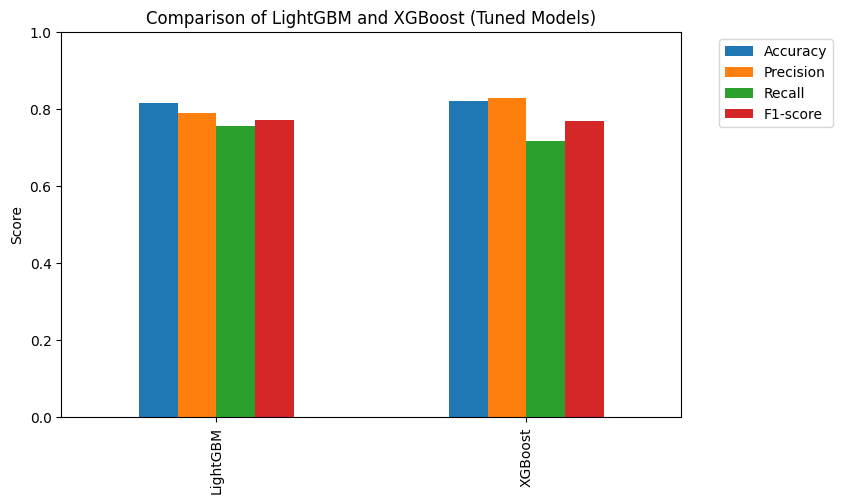

In [98]:
# --- Visualization ---
results_df.plot(kind='bar', figsize=(8,5))
plt.title('Comparison of LightGBM and XGBoost (Tuned Models)')
plt.ylabel('Score')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Interpretation**

* **XGBoost** achieved **higher accuracy and precision**, meaning it’s better at correctly identifying survivors without many false positives.
* **LightGBM** performed slightly better in **recall**, meaning it caught more actual survivors (fewer false negatives).
* Overall, **XGBoost is the stronger model** for this Titanic dataset — more balanced and generalizable.

---

### **Summary Conclusion**

> Both LightGBM and XGBoost performed well on the Titanic dataset, showing strong classification ability.
> After hyperparameter tuning, XGBoost achieved a slightly higher overall accuracy (82%) compared to LightGBM (81.5%).
> However, LightGBM showed a marginally better recall, indicating it may be preferable if the goal is to minimize false negatives (e.g., identifying as many survivors as possible).
> In general, **XGBoost outperformed LightGBM in precision and overall balance**, making it the preferred model for deployment.